# Import Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import os
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
%matplotlib inline 
# to plot figures in cells of notebook

# Initialize Environment

In [2]:
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")

models_dir = f"models/{date}"
logdir = f"logs/{date}"

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

writer = SummaryWriter(log_dir=logdir)

env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


# Initialize Agent

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()
# torch.save(agent.qnet_local.state_dict(), 'checkpoint1.pth')

# Train Agent

In [4]:
def dqn(writer, n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, score_to_achive=300.0):
  """Deep Q-Learning.
  Params
  ======
      n_episodes (int): maximum number of training episodes
      max_t (int): maximum number of timesteps per episode
      eps_start (float): starting value of epsilon, for epsilon-greedy action selection
      eps_end (float): minimum value of epsilon
      eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
  """
  scores = []                        # list containing scores from each episode
  scores_window = deque(maxlen=100)  # last 100 scores
  eps = eps_start                    # initialize epsilon
  for i_episode in range(1, n_episodes+1):
      state = env.reset()
      score = 0
      for t in range(max_t):
          action = agent.act(state, eps)
          next_state, reward, done, _ = env.step(action)
          agent.step(state, action, reward, next_state, done)
          state = next_state
          score += reward
          if done:
              break 
      scores_window.append(score)       # save most recent score
      scores.append(score)              # save most recent score
      eps = max(eps_end, eps_decay*eps) # decrease epsilon
      print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
      if i_episode % 100 == 0:
          print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
          torch.save(agent.qnet_local.state_dict(), f"{models_dir}/{i_episode}.pth")
      writer.add_scalar("Score/train", score, i_episode)
      if np.mean(scores_window)>=score_to_achive:
          print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
          torch.save(agent.qnet_local.state_dict(), 'checkpoint.pth')
          break
  return scores

Episode 100	Average Score: -174.91
Episode 200	Average Score: -102.34
Episode 300	Average Score: -103.16
Episode 400	Average Score: -18.417
Episode 500	Average Score: -8.894
Episode 600	Average Score: 54.32
Episode 700	Average Score: 137.66
Episode 800	Average Score: 147.53
Episode 900	Average Score: 153.91
Episode 1000	Average Score: 141.56
Episode 1100	Average Score: 149.50
Episode 1200	Average Score: 201.11
Episode 1300	Average Score: 232.01
Episode 1400	Average Score: 225.87
Episode 1500	Average Score: 228.98
Episode 1600	Average Score: 241.85
Episode 1700	Average Score: 241.98
Episode 1800	Average Score: 261.81
Episode 1900	Average Score: 258.25
Episode 2000	Average Score: 259.81
Episode 2100	Average Score: 257.86
Episode 2200	Average Score: 262.37
Episode 2300	Average Score: 258.74
Episode 2400	Average Score: 248.94
Episode 2500	Average Score: 270.26
Episode 2600	Average Score: 270.46
Episode 2700	Average Score: 265.22
Episode 2800	Average Score: 253.64
Episode 2900	Average Score

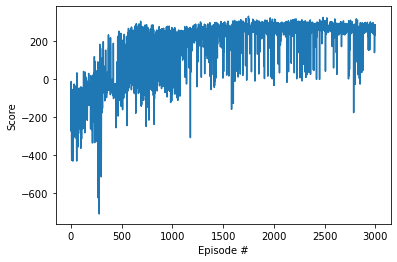

In [5]:
scores = dqn(writer=writer)
writer.flush()
writer.close()
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Run Tensorboard

In [7]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=logs

# Visualization

In [6]:
from dqn_agent import Agent
env = gym.make('LunarLander-v2')
env.seed(0)
agent = Agent(state_size=8, action_size=4, seed=0)
# load the weights from file
agent.qnet_local.load_state_dict(torch.load(f'{models_dir}/3000.pth', map_location=torch.device('cpu')))
# agent.qnet_local.load_state_dict(torch.load('models/2022_02_22-02:28:23_PM/2400.pth', map_location=torch.device('cpu')))

for i in range(3):
    state = env.reset()
    for j in range(400):
        action = agent.act(state)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()